In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# preparation of data

In [17]:
import os
path=os.listdir('Documents/Brain Tumor Detection/Training/')
classes={'no_tumor':0,'pituitary_tumor':1}

In [7]:
!pip install opencv-python

In [18]:
import cv2
x=[]
y=[]
for cls in classes:
    pth='Documents/Brain Tumor Detection/Training/' +cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(200,200))
        x.append(img)
        y.append(classes[cls])

In [19]:
np.unique(y)

array([0, 1])

In [20]:
x=np.array(x)
y=np.array(y)

In [21]:
pd.Series(y).value_counts()

0    395
1    380
dtype: int64

In [22]:
x.shape

(775, 200, 200)

# data visualization

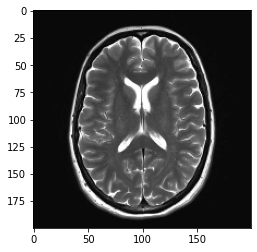

In [24]:
plt.imshow(x[5],cmap='gray')

# flatten image

In [26]:
X_update=x.reshape(len(x),-1)
X_update.shape

(775, 40000)

# data spliting

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(X_update,y,random_state=10,test_size=.20)

In [28]:
xtrain.shape,xtest.shape

((620, 40000), (155, 40000))

# Feature Scaling

In [30]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/xtrain.max()
xtest=xtest/xtest.max()
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature Selection

In [31]:
# data is small enough and loss of data could occur so not reducing features

# Train model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [33]:
lg= LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [34]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

# Evaluation

In [35]:
print("Training Score: ",lg.score(xtrain,ytrain))
print("Training Score: ",lg.score(xtest,ytest))

Training Score:  1.0
Training Score:  0.9548387096774194


In [36]:
print("Training Score: ",sv.score(xtrain,ytrain))
print("Training Score: ",sv.score(xtest,ytest))

Training Score:  0.9951612903225806
Training Score:  0.9548387096774194


# Predition

In [37]:
pred=sv.predict(xtest)
np.where(ytest!=pred)

(array([  5,   7,  39,  64, 135, 146, 149], dtype=int64),)

In [40]:
pred[39]

0

In [41]:
ytest[39]

1

# Test Model

In [42]:
dec={0:'No tumor',1:'Positive Tumor'}

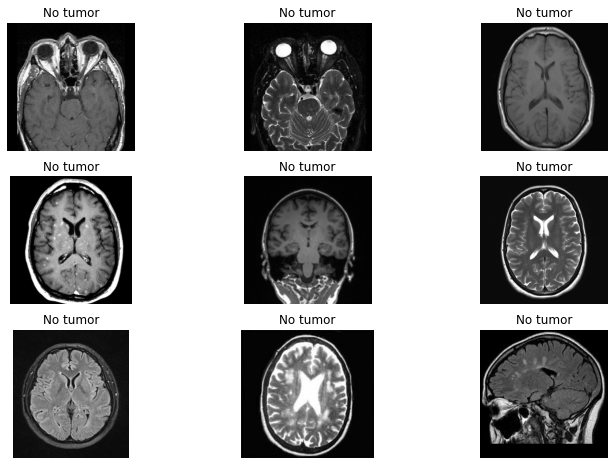

In [43]:
plt.figure(figsize=(12,8))
p=os.listdir('Documents/Brain Tumor Detection/Training/')
c=1
for i in os.listdir('Documents/Brain Tumor Detection/Training/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread('Documents/Brain Tumor Detection/Training/no_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

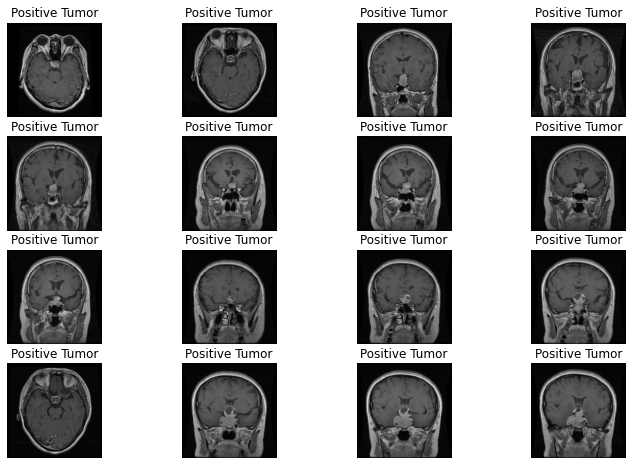

In [44]:
plt.figure(figsize=(12,8))
p=os.listdir('Documents/Brain Tumor Detection/Training/')
c=1
for i in os.listdir('Documents/Brain Tumor Detection/Training/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    img=cv2.imread('Documents/Brain Tumor Detection/Training/pituitary_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1